# How to use Gymnasium
Gymnasium is a toolkit comprised with several environments aimed at testing and comparing diferent reinforcement learning algorithms. Gymnasium supersedes OpenAI's Gym toolkit

They provide 7 groups of environments:

* Algorithms: Text-based environments to train how to do computations.
* Atari: Environments based on atari games like pong.
* Box2D: 2D control task environments.
* Classic control: Classic problems present in RL literature.
* MuJoCo: 3D continuous control task environments.
* Robotics: 3D environments featuring a robot arm or robot hand.
* Toy text: Simple environments in which the state is rendered  as text.

For more information check the [Gymnasium](https://gymnasium.farama.org/).

## Installing Gymnasium on Google Colab

In [ ]:
# Uncomment the next lines
!pip install gym[all]  --no-deps

## Gym Dependencies

In [ ]:
import gym as gym
print(gym.__version__)

0.25.2


## Instantiate the Environment
At this point you call the method `make` of the gym class to instantiate the desired environment and arguments if required.

In [ ]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In this case the environment is a blackjack card game.

In this game the player's goal is to obtain cards that sum to as close as possible to 21 without going over.

The game starts with the dealer having one face up and one face down card and the player having two face up cards. The player has two possibilities:
- Hit (get another card)
- Stick (stay with the cards he already has)
If the sum of the player's cards is over 21, the player busts.

After the player sticks, the dealer reveals his facedown card, and draws until the sum is 17 or greater. If the dealer goes bust the player wins.

If neither player nor dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

The reward for winning is +1, drawing is 0, and losing is -1. If the player wins with a natural blackjack (an A and a 10), the winning is worth +1.5.

## Checking the State and Action Spaces

To check the shape of the state space, simply call `observation_space` on the environment variable:

In [ ]:
env.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

For this environment the observation space is:

1. The sum of the 2 cards in the player's hand. The sum is at most 31.
2. The card that the dealer is currently showing. The cards' values are
 - Ace may have a value of 10 (usable ace) or 1 (non usable ace).
 - Number cards keep their values, from 2 to 10.
 - Face cards J, Q, and K have a value of 10.
3. If the player has an usable ace or not.



To get a random observation call the `sample()` method on the `observation_space`:

In [ ]:
env.observation_space.sample()

(10, 7, 1)

The same goes for the action space:

In [ ]:
env.action_space

Discrete(2)

In [ ]:
env.action_space.sample()

0

## Resetting the Environment

Resetting the environment means to begin a **new episode** and get the **starting observation**. With Gym, use the method `reset()` on the environment instance.

In [ ]:
observation, info = env.reset()

In [ ]:
observation= env.reset()
print(observation)

(12, 8, False)


## Performing an Action
To make the agent act on the environment, use the method `step(action)` on the environment instance. Action has to be one of the valid actions of the environment.

In the case of blackjack game, we have hit = 1 and stick = 0.

The `step(action)` method returns the following:
- A new observation.
- The reward of the last action.
- Two booleans variable to check if the episode is finished or truncated (stoped for other reasons).
- Extra info (it depends on the Gym environment). For blackjack is an empty dict.

In [ ]:
observation, reward, terminated, truncated, info = env.step(1)
print(f'{observation}, {reward}, {terminated}, {truncated}, {info}')

In [ ]:
observation, reward, terminated, info = env.step(1)
print(f'{observation}, {reward}, {terminated}, {info}')

(39, 8, False), -1.0, True, {'TimeLimit.truncated': False}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## A Random Agent

Let's test this environment with a random agent, in which each action (hit or stick) has a probability of 50%.

In [ ]:
observation, info = env.reset()
print(observation)
done = False
while not done:
    action = env.action_space.sample() # Choose a random action from the action space
    observation, reward, terminated, truncated, info = env.step(action)

    done = terminated or truncated

    print(f'{observation}, {reward}, {terminated}, {truncated}, {info}')
env.close()

In [ ]:
observation = env.reset()
print(observation)
done = False
while not done:
    action = env.action_space.sample() # Choose a random action from the action space
    observation, reward, terminated, info = env.step(action)

    done = terminated or truncated

    print(f'{observation}, {reward}, {terminated}, {info}')
env.close()

(11, 2, False)
(11, 2, False), 1.0, True, {'TimeLimit.truncated': False}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Viewing an environment

There are many ways to visualize and manipulate images in google colab/jupyter notebook. One of them is through OpenCV. Just import to the project ``cv2`` to convert the image to BGR (to visualize with OpenCV) and  ``cv2_imshow`` to show the image.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Check if we running in Google Colab or Jupyter Notebook
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print('Running in Google Colab')
    # Connect with Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    # This auxiliary function simplifies the visualization of OpenCV Images
    from google.colab.patches import cv2_imshow
else:
    print('Running in Jupyter Notebook')
    # This auxiliary function simplifies the visualization of OpenCV Images
    def cv2_imshow(img, title=''):
        if img.ndim > 2:
            img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # view the image in its natural size
            plt.figure(figsize=(img.shape[1], img.shape[0]), dpi=1)
            plt.imshow(img)
            plt.title(title)
            plt.xticks([]), plt.yticks([])
            plt.show()
        else:
            # view the image in its natural size
            plt.figure(figsize=(img.shape[1], img.shape[0]), dpi=1)
            plt.imshow(img, cmap='gray')
            plt.title(title)
            plt.xticks([]), plt.yticks([])
            plt.show()

Running in Google Colab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
env = gym.make('Blackjack-v1', render_mode='rgb_array')
observation, _ = env.reset()
image = env.render()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

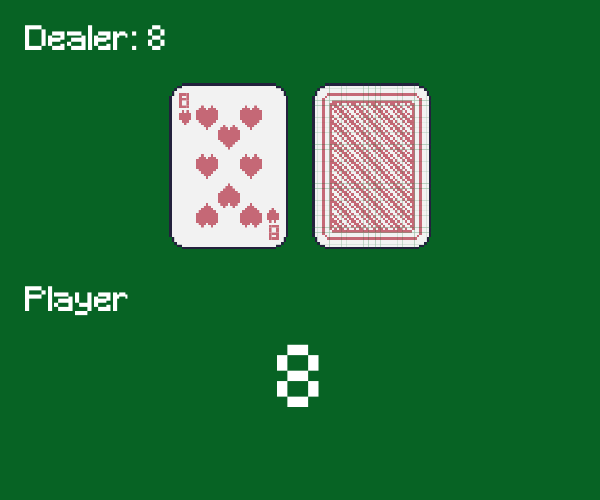

In [ ]:
import numpy as np
import cv2
env = gym.make('Blackjack-v1', render_mode='rgb_array')
observation = env.reset()
image_list = env.render(mode='rgb_array')
image = image_list[0]
image = cv2.cvtColor(np.array(image, dtype=np.uint8), cv2.COLOR_RGB2BGR)
cv2_imshow(image)

Much nicer :)

Let's try a second environment Acrobot

In [ ]:
env = gym.make('Acrobot-v1', render_mode = 'rgb_array')
observation, _ = env.reset()
image = env.render()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

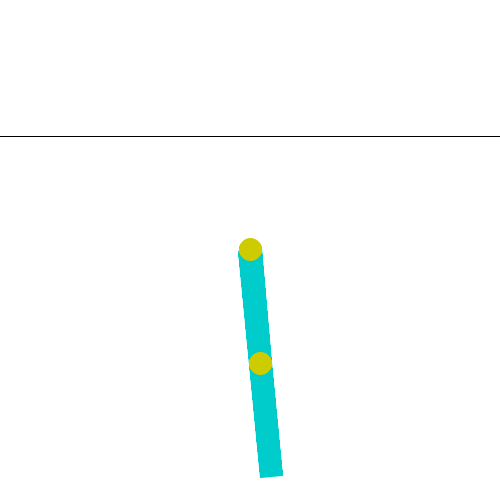

In [ ]:
env = gym.make('Acrobot-v1', render_mode = 'rgb_array')
observation = env.reset()
image_list = env.render(mode='rgb_array')
image = image_list[0]
image = cv2.cvtColor(np.array(image, dtype=np.uint8), cv2.COLOR_RGB2BGR)
cv2_imshow(image)

## Helper to Save Videos
We are going to define a function that generates a video out of a list of frames. We will use this helpers in all notebooks

In [ ]:
# Video management imports
import cv2

# Helper functions to save videos and images
def save_video(img_array, path='/content/drive/MyDrive/Master de Datos/Smart Robotics/Videos OpenAI Gym'):
  height, width, layers = img_array[0].shape
  size = (width, height)
  out = cv2.VideoWriter(path, cv2.VideoWriter_fourcc(*'AVC1'), 15, size)
  for i in range(len(img_array)):
    bgr_img = cv2.cvtColor(img_array[i], cv2.COLOR_RGB2BGR)
    out.write(bgr_img)
  out.release()
  print('Video saved.')

def save_images(img_array, path='./images'):
  for i, image in enumerate(img_array):
    bgr_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path + '/img_' + str(i) + '.jpg', bgr_img)

In [ ]:
def save_video(img_array, path='/content/drive/MyDrive/Master de Datos/Smart Robotics/Videos OpenAI Gym/'):
    # Ensure img_array[0] is a NumPy array
    if isinstance(img_array[0], list):
        img_array[0] = np.array(img_array[0][0])  # Take the first image from the list

    height, width, _ = img_array[0].shape
    size = (width, height)
    out = cv2.VideoWriter(path, cv2.VideoWriter_fourcc(*'AVC1'), 15, size)

    for img in img_array:
        if isinstance(img, list):
            img = np.array(img[0])  # Take the first image from the list
        bgr_img = cv2.cvtColor(np.array(img, dtype=np.uint8), cv2.COLOR_RGB2BGR)
        out.write(bgr_img)

    out.release()
    print('Video saved.')

Once we have defined this function, we can run again an episode loop. In this case, we can simply store the image generated by the environment into a list. We will use this list as frames for image generation.

In [ ]:
# The same random agent but saving an image array
observation, info = env.reset()
done = False
img_array = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    image = env.render()
    img_array.append(image)
env.close()

In [ ]:
# The same random agent but saving an image array
observation = env.reset()
done = False
img_array = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, info = env.step(action)
    done = terminated

    image = env.render()
    img_array.append(image)
env.close()

We can call save_video to store the file

In [ ]:
# Remember to create a 'video' folder
save_video(img_array)

Video saved.


Finally, we can embed the video in our notebook.

In [ ]:
from IPython.display import Video
Video('./video/test.mp4', embed=True)

Let's explore the Acrobot environment. Let's start by analyzing its observation space:

In [ ]:
env.observation_space

Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)

In this case we have 6 continuous observations (float32). The first vector indicates the lower limit values for this variables, while the second indicated the upper limits.

In [ ]:
env.action_space

Discrete(3)

In this case we have 3 discrete actions that we can perform.

Let's try another environment: Pendulum

In [ ]:
env = gym.make("Pendulum-v1", render_mode='rgb_array')

# Let's get some info about the observation and action spaces
print(env.observation_space)
print(env.action_space)

# A random Pendulum
observation, info= env.reset()
done = False
img_array = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    image = env.render()
    img_array.append(image)
env.close()

In [ ]:
env = gym.make("Pendulum-v1", render_mode='rgb_array')

# Let's get some info about the observation and action spaces
print(env.observation_space)
print(env.action_space)

# A random Pendulum
observation = env.reset()
done = False
img_array = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, info = env.step(action)
    done = terminated

    image = env.render()
    img_array.append(image)
env.close()

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Box(-2.0, 2.0, (1,), float32)


In [ ]:
save_video(img_array, path='video/gym_pendulum.mp4')

Video saved.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Video('./video/gym_pendulum.mp4', embed=True)


As we can see above Pendulum has both a continuous action and observation space. The observation space in the position of pendulum:
- x, y coordinates of the end of the pendulum in meters.
- the angle in radians

The action is a torque tau in Nm.

# Exercise

Can we solve an environment such as Pendulum with Value iteration? Why?




Although Value Iteration is a powerful algorithm for discrete MDPs, it is not directly applicable to continuous state and action spaces, such as those found in the Pendulum environment. Continuous state and action problems often require more advanced algorithms designed to handle such spaces.

# Other Environments

Finally let's try another environment: Reacher. Reacher as many RL is defined using a simulation. In this case the simulation is based on the Mujoco library. This library provides primitives to simulate complex mechanisms in a physically realistic way.

In [ ]:
env = gym.make("Reacher-v4", render_mode='rgb_array')

# Let's get some info about the observation and action spaces
print(env.observation_space)
print(env.action_space)

# A random Pendulum
observation, info= env.reset()
done = False
img_array = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    image = env.render()
    img_array.append(image)
env.close()

save_video(img_array, path='video/gym_humanoid.mp4')
Video('./video/gym_humanoid.mp4', embed=True)

## Custom Environment

One of the advantages of using Gymnasium and RL-based algorithms based on the OpenAI's Gym API is that we can easily create our own environment.

### Example 1: Two Arm Bandit

This environment has a limited set of states and our agent can only move right or left.

In [ ]:
from gym import spaces
import numpy as np

class TwoArmedBanditEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        super(TwoArmedBanditEnv, self).__init__()

        self.reward_range = (-100.0, 100.0)
        self.action_space = spaces.Discrete(2) # Two actions: left and right
        self.observation_space = spaces.Discrete(5) # 5 posible observation values

        self.rewards = np.array([+100, -10, 0, -5, -100]) # The rewars of each state, usually computed

    def reset(self):
        self.current_pos = 2 # usually randomized
        observations = (self.current_pos)
        return observations, None

    def step(self, action):
        if action == 0: # Move Left
            self.current_pos -= 1
        if action == 1: # Move right
            self.current_pos += 1
        terminated = ((self.current_pos == 0) or (self.current_pos == 4)) # Positions 0 and 4 are final
        truncated = False
        observations = (self.current_pos)
        reward = self.rewards[self.current_pos]
        return observations, reward, terminated, truncated, None

    def render(self):
        output = ['_','_','_', '_', '_']
        output[self.current_pos]='*'
        print(output)

In [ ]:
#from gymnasium.envs.registration import register

#register(
#    id='TwoArmedBandit-v0',
#    entry_point='path.to.module:TwoArmedBanditEnv',
#)

In [ ]:
#env = gym.make("TwoArmedBandit-v0", render_mode='human')
env = TwoArmedBanditEnv()

# Let's get some info about the observation and action spaces
print(env.observation_space)
print(env.action_space)

# A random Pendulum
observation, info = env.reset()
done = False
rewards = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    rewards.append(reward)
    env.render()

env.close()
print(f"Rewards: {rewards}, accumulated: {sum(rewards)}")


Discrete(5)
Discrete(2)
['_', '_', '_', '*', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['*', '_', '_', '_', '_']
Rewards: [-5, 0, -10, 0, -10, 100], accumulated: 75


### Exercise

Run the TwoArmBandit environment in a loop several times (100) and store some statistics: number of steps and accumulated reward for each step. In each iteration compute the accumulated reward for each state in reverse and add it to the cell:

For example if the output is:
```txt
['_', '*', '_', '_', '_']
['*', '_', '_', '_', '_']
```
Rewards: [-10, 100], accumulated: 90
We have:
-    accum_reward[0] += 100 #(for the first cell or #0)
-    accum_reward[1] += 90 #( 100 -10 for cell #1)



In [ ]:
import gym
import numpy as np

# Define the environment
env = TwoArmedBanditEnv()

# Number of episodes
num_episodes = 100

# Initialize an array to store accumulated rewards for each state
num_states = env.observation_space.n
accum_rewards = np.zeros(num_states)

for episode in range(1, num_episodes + 1):
    # Reset the environment for a new episode
    observation, info = env.reset()
    done = False
    rewards = []

    while not done:
        # Choose a random action
        action = env.action_space.sample()

        # Take a step in the environment
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Accumulate rewards for each time step
        rewards.append(reward)
        env.render()

    # Calculate the accumulated reward for each state in reverse order
    for i, r in enumerate(reversed(rewards)):
        accum_rewards[observation] += r  # Adjust the index to match the number of states

    # Print the observation for the episode
    print(f'Episode {episode}: Observation: {observation}')

    # Print the rewards and accumulated reward
    print(f'Rewards: {rewards}, accumulated: {sum(rewards)}\n')

# Print the accumulated rewards for each state
print(f'Accumulated rewards for each state: {accum_rewards}')

# Close the environment
env.close()

['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['*', '_', '_', '_', '_']
Episode 1: Observation: 0
Rewards: [-10, 0, -10, 100], accumulated: 80

['_', '*', '_', '_', '_']
['*', '_', '_', '_', '_']
Episode 2: Observation: 0
Rewards: [-10, 100], accumulated: 90

['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['*', '_', '_', '_', '_']
Episode 3: Observation: 0
Rewards: [-10, 0, -10, 0, -10, 100], accumulated: 70

['_', '_', '_', '*', '_']
['_', '_', '*', '_', '_']
['_', '_', '_', '*', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '_', '_', '*', '_']
['_', '_', '*', '_', '_']
['_', '_', '_', '*', '_']
['_', '_', '_', '_', '*']
Episode 4: Observation: 4
Rewards: [-5, 0, -5, 0, -10, 0, -5, 0, -5, -100], accumulated: -130

['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '*', '_', '_', '_']
['_', '_', '*', '_', '_']
['_', '_', '_

## Example 2: BallEnv

In [ ]:
import math

class BallEnv(gym.Env):

    metadata = {'render.modes': ['rgb_array']}

    def __init__(self):
        super().__init__()

        self.reward_range = (-1.0, 1.0)
        self.action_space = spaces.Box(low=np.array([0]), high=np.array([2]), dtype=np.float32)
        self.observation_space = spaces.Box(low=np.array([0]), high=np.array([10]), dtype=np.float32)

        self.BALL_RADIUS = 0.1

        self.y = 10


    def reset(self, seed=None, options=None):
        # Reset the state of the environment to an initial state
        self.y = np.random.rand()*10

        return np.array([self.y]), False

    def step(self, action):
        self.y += action[0] # We simply add the action
        self.y -= 1      # And decay to move to the ground as if falling

        terminated = False
        truncated = False
        reward = - math.fabs(self.y-10)

        if self.y > 20 or self.y < 0:
            terminated = True

        info = {}

        return np.array([self.y]), reward, terminated, truncated, info

    def render(self):
        SCALE = 20
        def t(x,y):
            return (320 + int(SCALE*x), 470 - int(SCALE*y))

        image = np.ones((480, 640, 3), dtype=np.uint8 )*255

        cv2.circle(image, t(0, self.y), int(SCALE*self.BALL_RADIUS), (0, 0, 255))
        cv2.line(image, t(-10, 0), t(10, 0), (0.2, 0, 0), 2)
        cv2.line(image, t(-1, 10), t(1, 10), (0.2, 0, 0), 1)
        cv2.line(image, t(-1, 20), t(1, 20), (0.2, 0, 0), 2)

        return image

In [ ]:
env = BallEnv()

# Let's get some info about the observation and action spaces
print(env.observation_space)
print(env.action_space)

# A random Pendulum
observation, info = env.reset()
done = False
rewards = []
imgs = []
while not done:
    action = env.action_space.sample() # Choose a random action
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    rewards.append(reward)
    img = env.render()
    imgs.append(img)

env.close()
print(f"Rewards: {rewards}, accumulated: {sum(rewards)}")

save_video(imgs, path='./video/random_ballenv.mp4')

Box(0.0, 10.0, (1,), float32)
Box(0.0, 2.0, (1,), float32)
Rewards: [-9.541294906153583, -10.264265749468708], accumulated: -19.80556065562229
Video saved.


/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


### Exercise: Find Home

Develop an environment where an agent, a robot, can move freely. The agent can move from (-10, 10) in X and Y axis. In every episode the agent will be spawn at a random position in the environment. The episode ends if the agent reaches the center of the environment, that is if the distance to the center is below 1.0.

Create this environment and test it with a random agent. To avoid infinite episodes end the episode after 200 steps.

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

class FreeMoveEnv(gym.Env):
    def __init__(self):
        super(FreeMoveEnv, self).__init__()
        self.episode_count = 1

        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10, high=10, shape=(2,), dtype=np.float32)

        self.max_steps = 200
        self.current_step = 0
        self.agent_positions = np.empty((0, 2))

        self.epsilon = 0.2

    def reset(self):
        self.current_step = 0
        initial_observation = np.random.uniform(low=-10, high=10, size=(2,))
        self.agent_positions = np.array([initial_observation])
        return initial_observation

    def step(self, action):
        self.current_step += 1

        # Estrategia epsilon-greedy
        if np.random.rand() < self.epsilon:
            action = self.action_space.sample()  # Selecciona una acción aleatoria

        observation = self.agent_positions[-1] + action
        distance_to_center = np.linalg.norm(observation)

        terminated = False
        truncated = False
        reward = -distance_to_center  # Negative reward based on distance to center

        if distance_to_center < 1.0 or self.current_step >= self.max_steps:
            terminated = True
            truncated = self.current_step >= self.max_steps

        self.agent_positions = np.vstack([self.agent_positions, observation])

        info = {}

        # Imprime información del episodio si termina
        if terminated or truncated:
            print(f"Episode {self.episode_count}: Num Steps: {self.current_step}")
            self.episode_count += 1

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        if mode == 'human':
            plt.figure(figsize=(6, 6))
            plt.scatter(self.agent_positions[:, 0], self.agent_positions[:, 1], color='blue', marker='o', label='Agent')
            plt.title('Agent Trajectory')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.axhline(0, color='black', linewidth=1, linestyle='--')
            plt.axvline(0, color='black', linewidth=1, linestyle='--')
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.legend()
            plt.show()
        else:
            super(FreeMoveEnv, self).render(mode=mode)

In [ ]:

env = FreeMoveEnv()

# Random agent
for episode in range(20):  # Run for 20 episodes
    total_reward = 0
    observations = []  # Almacena las observaciones para visualización
    observation = env.reset()
    for _ in range(env.max_steps):
        action = np.random.uniform(low=-1, high=1, size=(2,))
        observation, reward, done, _, _ = env.step(action)
        total_reward += reward
        observations.append(observation.copy())  # Almacena copia de la observación
        if done:
            print(f"Episode {episode + 1} finished. Total Reward Accumulated: {total_reward}")

            # Visualize the trajectory after each episode is finished
            env.render()
            plt.plot(np.array(observations)[:, 0], np.array(observations)[:, 1], label='Trajectory', color='orange')
            plt.legend()
            plt.show()

            break

env.close()